## <font color= #8FC3FA> **Movie Dataset** </font>

In [34]:
import pandas as pd
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
movies = pd.read_csv('data/movies.csv')
links = pd.read_csv('data/links.csv') 
ratings = pd.read_csv('data/ratings.csv') 
tags = pd.read_csv('data/tags.csv') 

df = pd.merge(movies, tags, on='movieId')
df = pd.merge(df, links, on='movieId')
df = pd.merge(df, ratings, on='movieId')

df.head()

,movieId,title,genres,userId_x,tag,timestamp_x,imdbId,tmdbId,userId_y,rating,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,114709,862.0,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,114709,862.0,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,114709,862.0,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,114709,862.0,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,114709,862.0,17,4.5,1305696483


## <font color= #8FC3FA> **Data Cleaning** </font>

Adding genres columns

In [13]:
# Split the genres
df['genres_split'] = df['genres'].apply(lambda x: re.split(r'\W+', x))

# Get all the unique genres
genres = set(genre for sublist in df['genres_split'] for genre in sublist if genre)

# One-Hot Encoding
for genre in genres:
    df[genre] = df['genres_split'].apply(lambda x: int(genre in x))

# Drop the column
df.drop(columns=['genres_split', 'genres'], inplace=True)

In [14]:
df.head()

,movieId,title,userId_x,tag,timestamp_x,imdbId,tmdbId,userId_y,rating,timestamp_y,...,Romance,Musical,Sci,Animation,Fantasy,Children,Thriller,IMAX,Comedy,no
0,1,Toy Story (1995),336,pixar,1139045764,114709,862.0,1,4.0,964982703,...,0,0,0,1,1,1,0,0,1,0
1,1,Toy Story (1995),336,pixar,1139045764,114709,862.0,5,4.0,847434962,...,0,0,0,1,1,1,0,0,1,0
2,1,Toy Story (1995),336,pixar,1139045764,114709,862.0,7,4.5,1106635946,...,0,0,0,1,1,1,0,0,1,0
3,1,Toy Story (1995),336,pixar,1139045764,114709,862.0,15,2.5,1510577970,...,0,0,0,1,1,1,0,0,1,0
4,1,Toy Story (1995),336,pixar,1139045764,114709,862.0,17,4.5,1305696483,...,0,0,0,1,1,1,0,0,1,0


Adding years columns:

In [33]:
df['year'] = df['title'].str.extract(r'\((\d{4})\)').astype('Int64')
df.head()

,movieId,title,userId_x,tag,timestamp_x,imdbId,tmdbId,userId_y,rating,timestamp_y,...,Musical,Sci,Animation,Fantasy,Children,Thriller,IMAX,Comedy,no,year
0,1,Toy Story (1995),336,pixar,1139045764,114709,862.0,1,4.0,964982703,...,0,0,1,1,1,0,0,1,0,1995
1,1,Toy Story (1995),336,pixar,1139045764,114709,862.0,5,4.0,847434962,...,0,0,1,1,1,0,0,1,0,1995
2,1,Toy Story (1995),336,pixar,1139045764,114709,862.0,7,4.5,1106635946,...,0,0,1,1,1,0,0,1,0,1995
3,1,Toy Story (1995),336,pixar,1139045764,114709,862.0,15,2.5,1510577970,...,0,0,1,1,1,0,0,1,0,1995
4,1,Toy Story (1995),336,pixar,1139045764,114709,862.0,17,4.5,1305696483,...,0,0,1,1,1,0,0,1,0,1995


## <font color= #8FC3FA> **EDA** </font>

Top ranked genres in 2005:

In [ ]:
year_2005 = df[df["year"] == 2005]



show_rep.nlargest(10, "Explicit").drop(["total", "Implicit"], axis=1).plot(kind="bar", cmap="Pastel1", xlabel="", ylabel="queer characters", legend="")

<Axes: xlabel='title'>

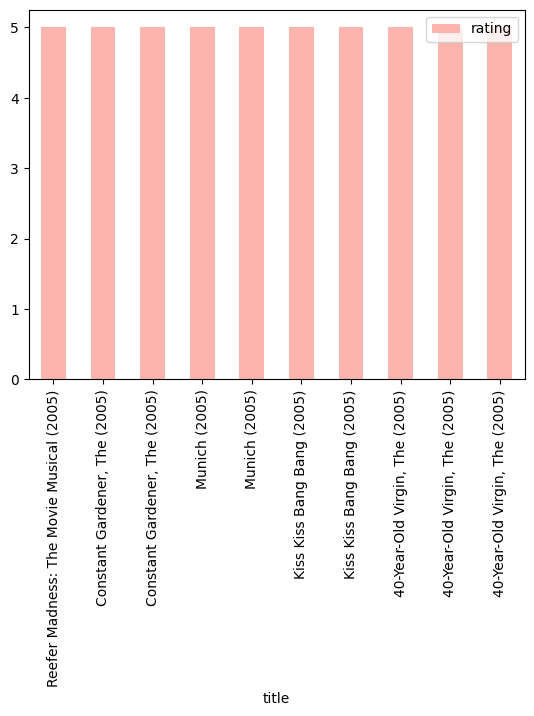

In [57]:
year_2005[['title', 'rating']].sort_values(by='rating',ascending=False).head(10).plot(kind='bar', colormap='Pastel1', x='title', y='rating')